In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 数据集路径
train_data_path = '/content/drive/My Drive/emotion_data/train'
test_data_path = '/content/drive/My Drive/emotion_data/test'


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 51.66%
Precision: 0.4163
Recall: 0.4263
F1 Score: 0.4147


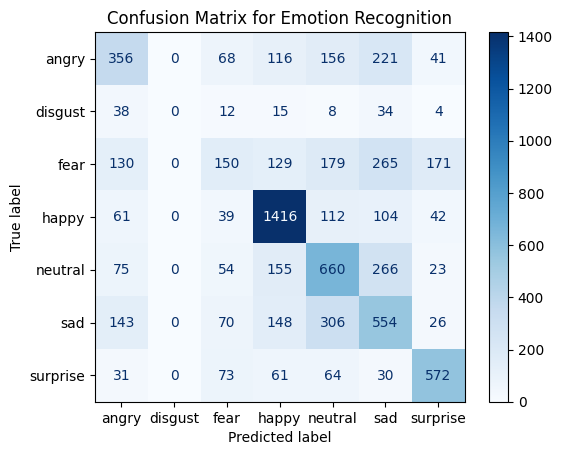

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 评估模型函数
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []

    # 遍历测试集，获取所有真实标签和预测标签
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # 计算指标
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='macro')
    recall = recall_score(all_labels, all_predictions, average='macro')
    f1 = f1_score(all_labels, all_predictions, average='macro')
    conf_matrix = confusion_matrix(all_labels, all_predictions)

    # 输出结果
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # 绘制混淆矩阵
    class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Emotion Recognition")
    plt.show()

# 调用评估函数
evaluate_model(model, test_loader)


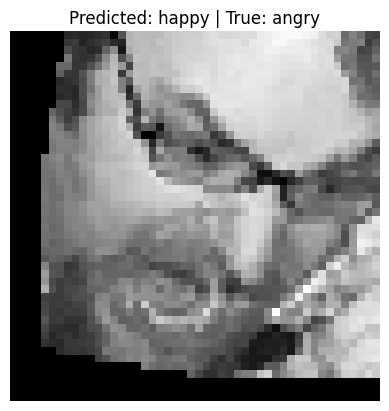

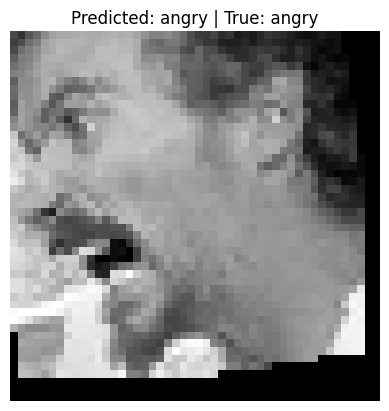

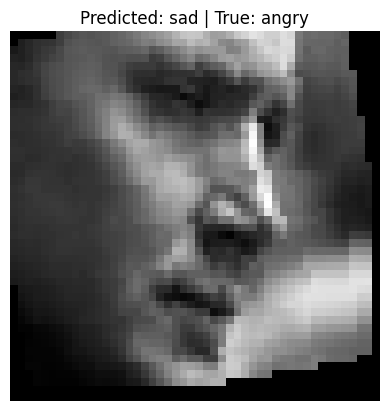

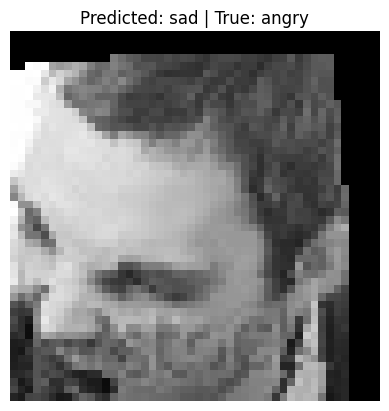

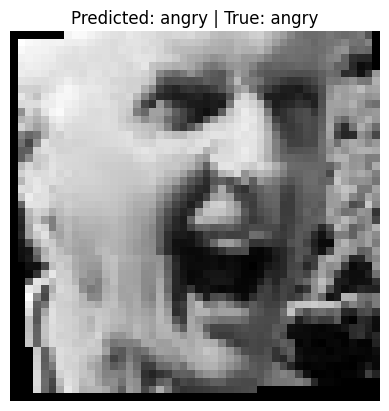

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 可视化分类结果函数
def visualize_predictions(model, test_loader, class_names, num_images=5):
    model.eval()
    images_shown = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            # 转换为 CPU 张量
            images = images.cpu().numpy()
            predicted = predicted.cpu().numpy()
            labels = labels.cpu().numpy()

            for i in range(len(images)):
                if images_shown >= num_images:
                    return

                # 显示图像
                img = images[i].squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f"Predicted: {class_names[predicted[i]]} | True: {class_names[labels[i]]}")
                plt.axis("off")
                plt.show()

                images_shown += 1

# 类别标签
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# 调用函数，展示测试结果
visualize_predictions(model, test_loader, class_names, num_images=5)


In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 确保当前模型在 eval 模式
model.eval()

# 初始化标签列表和预测列表
all_labels = []
all_predictions = []

# 遍历测试集
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# 计算评估指标
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='macro')
recall = recall_score(all_labels, all_predictions, average='macro')
f1 = f1_score(all_labels, all_predictions, average='macro')
conf_matrix = confusion_matrix(all_labels, all_predictions)

# 输出评估指标
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 绘制混淆矩阵
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Emotion Recognition")
plt.show()


In [ ]:


# ==========================
# 4️⃣ 计算最终混淆矩阵 & 四个指标
# ==========================
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)
model.eval()

final_test_preds, final_test_labels = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        final_test_preds.extend(predicted.cpu().numpy())
        final_test_labels.extend(labels.cpu().numpy())

# 计算四个指标
final_acc = 100 * np.mean(np.array(final_test_preds) == np.array(final_test_labels))
final_precision = precision_score(final_test_labels, final_test_preds, average='macro')
final_recall = recall_score(final_test_labels, final_test_preds, average='macro')
final_f1 = f1_score(final_test_labels, final_test_preds, average='macro')

print("\n🎯 Final Evaluation Results:")
print(f"✅ Accuracy: {final_acc:.2f}%")
print(f"✅ Precision: {final_precision:.4f}")
print(f"✅ Recall: {final_recall:.4f}")
print(f"✅ F1-Score: {final_f1:.4f}")

# 绘制混淆矩阵
cm = confusion_matrix(final_test_labels, final_test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_folder.classes, yticklabels=train_folder.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Epoch 1/50:   0%|          | 0/453 [00:00<?, ?batch/s]<ipython-input-6-f4bfca94f1f0>:59: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch 1/50: 100%|██████████| 453/453 [01:27<00:00,  5.19batch/s]


✅ Epoch 1/50 | Test Accuracy: 52.83%
✅ Best model saved!


Epoch 2/50: 100%|██████████| 453/453 [01:24<00:00,  5.37batch/s]


✅ Epoch 2/50 | Test Accuracy: 52.52%


Epoch 3/50: 100%|██████████| 453/453 [01:22<00:00,  5.47batch/s]


✅ Epoch 3/50 | Test Accuracy: 55.14%
✅ Best model saved!


Epoch 4/50: 100%|██████████| 453/453 [01:22<00:00,  5.48batch/s]


✅ Epoch 4/50 | Test Accuracy: 54.92%


Epoch 5/50: 100%|██████████| 453/453 [01:24<00:00,  5.35batch/s]


✅ Epoch 5/50 | Test Accuracy: 55.71%
✅ Best model saved!


Epoch 6/50: 100%|██████████| 453/453 [01:23<00:00,  5.41batch/s]


✅ Epoch 6/50 | Test Accuracy: 54.74%


Epoch 7/50: 100%|██████████| 453/453 [01:23<00:00,  5.41batch/s]


✅ Epoch 7/50 | Test Accuracy: 55.20%


Epoch 8/50: 100%|██████████| 453/453 [01:23<00:00,  5.43batch/s]


✅ Epoch 8/50 | Test Accuracy: 55.21%


Epoch 9/50: 100%|██████████| 453/453 [01:26<00:00,  5.23batch/s]


✅ Epoch 9/50 | Test Accuracy: 56.23%
✅ Best model saved!


Epoch 10/50: 100%|██████████| 453/453 [01:23<00:00,  5.44batch/s]


✅ Epoch 10/50 | Test Accuracy: 55.95%


Epoch 11/50: 100%|██████████| 453/453 [01:22<00:00,  5.46batch/s]


✅ Epoch 11/50 | Test Accuracy: 56.00%


Epoch 12/50: 100%|██████████| 453/453 [01:23<00:00,  5.45batch/s]


✅ Epoch 12/50 | Test Accuracy: 55.53%


Epoch 13/50: 100%|██████████| 453/453 [01:24<00:00,  5.34batch/s]


✅ Epoch 13/50 | Test Accuracy: 56.26%
✅ Best model saved!


Epoch 14/50: 100%|██████████| 453/453 [01:23<00:00,  5.42batch/s]


✅ Epoch 14/50 | Test Accuracy: 56.24%


Epoch 15/50: 100%|██████████| 453/453 [01:22<00:00,  5.50batch/s]


✅ Epoch 15/50 | Test Accuracy: 55.67%


Epoch 16/50: 100%|██████████| 453/453 [01:23<00:00,  5.44batch/s]


✅ Epoch 16/50 | Test Accuracy: 56.53%
✅ Best model saved!


Epoch 17/50: 100%|██████████| 453/453 [01:25<00:00,  5.28batch/s]


✅ Epoch 17/50 | Test Accuracy: 55.24%


Epoch 18/50: 100%|██████████| 453/453 [01:25<00:00,  5.32batch/s]


✅ Epoch 18/50 | Test Accuracy: 57.24%
✅ Best model saved!


Epoch 19/50: 100%|██████████| 453/453 [01:22<00:00,  5.47batch/s]


✅ Epoch 19/50 | Test Accuracy: 55.38%


Epoch 20/50: 100%|██████████| 453/453 [01:21<00:00,  5.53batch/s]


✅ Epoch 20/50 | Test Accuracy: 50.67%


Epoch 21/50: 100%|██████████| 453/453 [01:22<00:00,  5.48batch/s]


✅ Epoch 21/50 | Test Accuracy: 56.05%


Epoch 22/50: 100%|██████████| 453/453 [01:22<00:00,  5.51batch/s]


✅ Epoch 22/50 | Test Accuracy: 55.73%


Epoch 23/50: 100%|██████████| 453/453 [01:24<00:00,  5.37batch/s]


✅ Epoch 23/50 | Test Accuracy: 55.61%


Epoch 24/50: 100%|██████████| 453/453 [01:22<00:00,  5.50batch/s]


✅ Epoch 24/50 | Test Accuracy: 57.72%
✅ Best model saved!


Epoch 25/50: 100%|██████████| 453/453 [01:23<00:00,  5.42batch/s]


✅ Epoch 25/50 | Test Accuracy: 57.68%


Epoch 26/50: 100%|██████████| 453/453 [01:24<00:00,  5.36batch/s]


✅ Epoch 26/50 | Test Accuracy: 58.26%
✅ Best model saved!


Epoch 27/50: 100%|██████████| 453/453 [01:22<00:00,  5.46batch/s]


✅ Epoch 27/50 | Test Accuracy: 58.40%
✅ Best model saved!


Epoch 28/50: 100%|██████████| 453/453 [01:23<00:00,  5.40batch/s]


✅ Epoch 28/50 | Test Accuracy: 58.87%
✅ Best model saved!


Epoch 29/50: 100%|██████████| 453/453 [01:21<00:00,  5.53batch/s]


✅ Epoch 29/50 | Test Accuracy: 58.25%


Epoch 30/50: 100%|██████████| 453/453 [01:20<00:00,  5.60batch/s]


✅ Epoch 30/50 | Test Accuracy: 59.08%
✅ Best model saved!


Epoch 31/50: 100%|██████████| 453/453 [01:21<00:00,  5.53batch/s]


✅ Epoch 31/50 | Test Accuracy: 59.21%
✅ Best model saved!


Epoch 32/50: 100%|██████████| 453/453 [01:21<00:00,  5.55batch/s]


✅ Epoch 32/50 | Test Accuracy: 59.50%
✅ Best model saved!


Epoch 33/50: 100%|██████████| 453/453 [01:21<00:00,  5.55batch/s]


✅ Epoch 33/50 | Test Accuracy: 59.58%
✅ Best model saved!


Epoch 34/50: 100%|██████████| 453/453 [01:31<00:00,  4.93batch/s]


✅ Epoch 34/50 | Test Accuracy: 59.63%
✅ Best model saved!


Epoch 35/50: 100%|██████████| 453/453 [01:31<00:00,  4.97batch/s]


✅ Epoch 35/50 | Test Accuracy: 59.07%


Epoch 36/50: 100%|██████████| 453/453 [01:30<00:00,  5.02batch/s]


✅ Epoch 36/50 | Test Accuracy: 59.43%


Epoch 37/50: 100%|██████████| 453/453 [01:27<00:00,  5.20batch/s]


✅ Epoch 37/50 | Test Accuracy: 59.47%


Epoch 38/50: 100%|██████████| 453/453 [01:24<00:00,  5.36batch/s]


✅ Epoch 38/50 | Test Accuracy: 59.39%


Epoch 39/50: 100%|██████████| 453/453 [01:24<00:00,  5.36batch/s]


✅ Epoch 39/50 | Test Accuracy: 57.65%


Epoch 40/50: 100%|██████████| 453/453 [01:24<00:00,  5.36batch/s]


✅ Epoch 40/50 | Test Accuracy: 59.72%
✅ Best model saved!


Epoch 41/50: 100%|██████████| 453/453 [01:28<00:00,  5.14batch/s]


✅ Epoch 41/50 | Test Accuracy: 60.30%
✅ Best model saved!


Epoch 42/50: 100%|██████████| 453/453 [01:23<00:00,  5.43batch/s]


✅ Epoch 42/50 | Test Accuracy: 60.07%


Epoch 43/50: 100%|██████████| 453/453 [01:21<00:00,  5.53batch/s]


✅ Epoch 43/50 | Test Accuracy: 60.38%
✅ Best model saved!


Epoch 44/50: 100%|██████████| 453/453 [01:25<00:00,  5.30batch/s]


✅ Epoch 44/50 | Test Accuracy: 59.95%


Epoch 45/50: 100%|██████████| 453/453 [01:23<00:00,  5.40batch/s]


✅ Epoch 45/50 | Test Accuracy: 59.89%


Epoch 46/50: 100%|██████████| 453/453 [01:22<00:00,  5.50batch/s]


✅ Epoch 46/50 | Test Accuracy: 59.58%


Epoch 47/50: 100%|██████████| 453/453 [01:22<00:00,  5.48batch/s]


✅ Epoch 47/50 | Test Accuracy: 59.60%


Epoch 48/50: 100%|██████████| 453/453 [01:22<00:00,  5.50batch/s]


✅ Epoch 48/50 | Test Accuracy: 59.52%


Epoch 49/50: 100%|██████████| 453/453 [01:23<00:00,  5.41batch/s]


✅ Epoch 49/50 | Test Accuracy: 61.08%
✅ Best model saved!


Epoch 50/50: 100%|██████████| 453/453 [01:22<00:00,  5.47batch/s]


✅ Epoch 50/50 | Test Accuracy: 60.20%

🎯 Final Evaluation Results:
✅ Accuracy: 60.45%
✅ Precision: 0.5605
✅ Recall: 0.5986
✅ F1-Score: 0.5682


NameError: name 'train_folder' is not defined

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(



🎯 Final Evaluation Results:
✅ Accuracy: 61.03%
✅ Precision: 0.5641
✅ Recall: 0.6084
✅ F1-Score: 0.5732


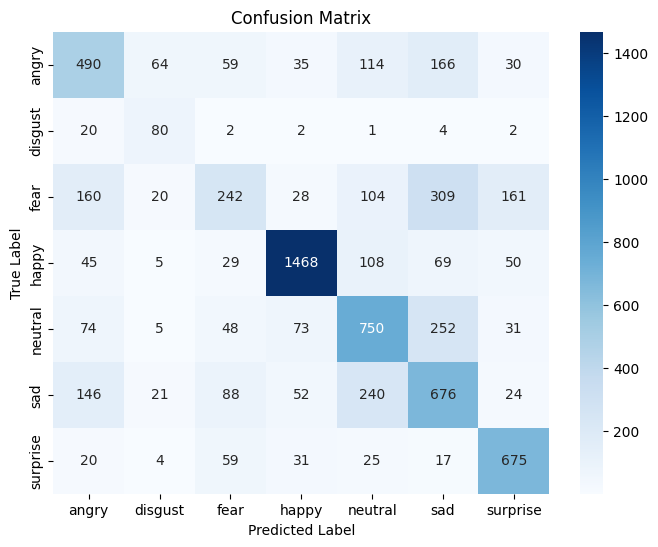

In [ ]:
# 4️⃣ 计算最终混淆矩阵 & 四个指标
# ==========================
model.load_state_dict(torch.load("best_model.pth"))
model.to(device)
model.eval()

final_test_preds, final_test_labels = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        final_test_preds.extend(predicted.cpu().numpy())
        final_test_labels.extend(labels.cpu().numpy())

# 计算四个指标
final_acc = 100 * np.mean(np.array(final_test_preds) == np.array(final_test_labels))
final_precision = precision_score(final_test_labels, final_test_preds, average='macro')
final_recall = recall_score(final_test_labels, final_test_preds, average='macro')
final_f1 = f1_score(final_test_labels, final_test_preds, average='macro')

print("\n🎯 Final Evaluation Results:")
print(f"✅ Accuracy: {final_acc:.2f}%")
print(f"✅ Precision: {final_precision:.4f}")
print(f"✅ Recall: {final_recall:.4f}")
print(f"✅ F1-Score: {final_f1:.4f}")

# 获取类别名称
class_names = test_dataset.dataset.classes if hasattr(test_dataset, 'dataset') else test_dataset.classes

# 绘制混淆矩阵
cm = confusion_matrix(final_test_labels, final_test_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()